In [1]:
#######################################################################
## Data extraction from the web using Python's Beautiful Soup module ##
#######################################################################

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#The urllib.request module is used to open URLs
from urllib.request import urlopen

#The Beautiful Soup package is used to extract data from html files
from bs4 import BeautifulSoup


In [5]:
#specify the url containing the dataset 
url = "http://www.hubertiming.com/results/2017GPTR10K"

#pass the url to urlopen() to get the html of the page.
html = urlopen(url)


In [6]:
#Create a Beautiful Soup object from the html. 
#this is done by passing the html to the BeautifulSoup() function.
soup = BeautifulSoup(html, 'lxml')

#The Beautiful Soup package is used to parse the html, 
#it takes the raw html text and break it into Python objects. 
#The second argument 'lxml' is the html parser.
type(soup)


bs4.BeautifulSoup

In [8]:
#The soup object extracts interesting information about the scraping's website
# Get the title of the page
title = soup.title

print(title)


<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [156]:
# Print out the text of the webpage
text = soup.get_text()
#print(soup.text)

#view the html of the webpage by right-clicking anywhere on the webpage and selecting "Inspect".


In [11]:
#Extract useful html tags within a webpage.
soup.find_all('a')
#this is the <a> for hyperlinks
#could be <table>, <tr> for table rows, <th> for table headers, <td> for table cells


[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img

In [28]:
#html tags sometimes come with attributes such as class, src... 
#You can use a for loop and the get('"href") method to extract and print out only hyperlinks.

all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))
    

mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [32]:
#To print out all table rows only, 
#pass the 'tr' argument in soup.find_all() instead of the 'a' above
rows = soup.find_all('tr')

#print the first 10 rows fo a sanity check 
#to see that the data has been scraped correctly
print(rows[:10])


[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

           

In [37]:
##############################################################################################################
## 1- The goal is to get all table rows tr in a list form first and then convert that list into a dataframe ##
##############################################################################################################

#Below is a for loop that iterates through table rows tr and prints out the cells td of the rows.
#rows = soup.find_all('tr')
for row in rows:
    row_td = row.find_all('td')
# the last value of row_td is printed.
print(row_td)
       
type(row_td)

#To store all the td elements from all the rows, 
#append each row_td list to a larger list outside the loop.



[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

In [47]:
######################################################################
##### 2- cleaning up HTML and extracting the text content from it ####
######################################################################

#Each row is printed with html tags embedded in each row.
#You can remove the html tags using Beautiful Soups.
#Pass the string of interest into BeautifulSoup() 
#and use the get_text() method to extract the text without html tags.

str_cells = str(row_td)  #convert bs4 element into string

#parse the html in str_cell, the parser used is lxml
#and extract the text content in cleantext
cleantext = BeautifulSoup(str_cells, "lxml").get_text() 

print(cleantext)
type(cleantext)


[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]
[577,443,

LIBBYBMITCHELL

,F,HILLSBORO,OR,1:41:18,1:42:10,]


In [39]:
############################################################
### 3- Or use regular expression to remove the html tags ###
############################################################

#importing the regular expression module
import re

#finds all the characters inside the < td > html tags 
#and replace them with an empty string for each table row.

#Compile a regular expression by passing a string to match to re.compile(). 
#The dot, star, and question mark (.*?) will match an opening angle bracket followed by anything 
#and followed by a closing angle bracket. It matches the shortest possible string. 
#Then, use the re.sub() method to find all the substrings where the regular expression matches 
#and replace them with an empty string

# The full code below generates an empty list, 
#extract text in between html tags for each row, 
#and append it to the assigned list.

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    
    list_rows.append(clean2)
print(clean2)
type(clean2)

#same result 


[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


str

In [157]:
################################
######   FINALLY             ###
###All 3 steps above together###
################################

list_rows_td = []
for row in rows:
    row_td = row.find_all('td')
    str_cells = str(row_td)
    
    cleanstr_cells = BeautifulSoup(str_cells, "lxml").get_text()
    
    list_rows_td.append(cleanstr_cells)
 
print(list_rows_td[:10])  #object list
#remove '/r/n//r/n' string


['[]', '[Finishers:, 577]', '[Male:, 414]', '[Female:, 163]', '[]', '[1, 814, \r\n\r\n                    JARED WILSON\r\n\r\n                , M, TIGARD, OR, 36:21, 36:24, ]', '[2, 573, \r\n\r\n                    NATHAN A SUSTERSIC\r\n\r\n                , M, PORTLAND, OR, 36:42, 36:45, \n\r\n                            INTEL TEAM F\r\n                        ]', '[3, 687, \r\n\r\n                    FRANCISCO MAYA\r\n\r\n                , M, PORTLAND, OR, 37:44, 37:48, ]', '[4, 623, \r\n\r\n                    PAUL MORROW\r\n\r\n                , M, BEAVERTON, OR, 38:34, 38:37, ]', '[5, 569, \r\n\r\n                    DEREK G OSBORNE\r\n\r\n                , M, HILLSBORO, OR, 39:21, 39:24, \n\r\n                            INTEL TEAM F\r\n                        ]']


In [56]:
#Convert the list into a dataframe and get a view of the first 10 rows.

df = pd.DataFrame(list_rows_td)
df.head(10)


,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


In [57]:
#The dataframe is not in the format we want. 
#To clean it up, split the "0" column into multiple columns at the comma position. 
#This is accomplished by using the str.split() method.

df1 = df[0].str.split(',', expand=True)
df1.head(10)


,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [65]:
#The dataframe has unwanted square brackets surrounding each row. 
#Use the strip() method to remove the opening square bracket on column "0."

df1[0] = df1[0].str.strip('[')
df1.head(10)


,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [58]:
#The table is missing table headers. 
#use the find_all() method to get the table headers.
col_labels = soup.find_all('th')

print(col_labels)


[<th>Place</th>, <th>Bib</th>, <th>Name</th>, <th>Gender</th>, <th>City</th>, <th>State</th>, <th>Time</th>, <th>Gun Time</th>, <th>Team</th>]


In [22]:
#Similar to table rows, use Beautiful Soup to extract text in between html tags for table headers.

all_header = []
col_str = str(col_labels)

cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)

print(all_header)


['[Place, Bib, Name, Gender, City, State, Time, Gun Time, Team]']


In [59]:
#Convert the list of headers into a dataframe
df2 = pd.DataFrame(all_header)
df2.head()


,0
0,"[Place, Bib, Name, Gender, City, State, Time, ..."


In [60]:
#Again Split column "0" into multiple columns at the comma position for all rows.
df3 = df2[0].str.split(',', expand=True)
df3.head()


,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]


In [67]:
#Now, The two dataframes can be concatenated into one using the concat() method
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)


,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]


In [68]:
#Assign the first row to be the table header.
df5 = df4.rename(columns=df4.iloc[0])
df5.head()


,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None


In [69]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     583 non-null    object
 1    Bib       581 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


(583, 9)

In [71]:
#The table has 583 rows and 9 columns. 
#Drop all rows with any missing values.

df6 = df5.dropna(axis=0, how='any')
print(df6.head())


   [Place   Bib                                               Name   Gender  \
0  [Place   Bib                                               Name   Gender   
5       1   814   \r\n\r\n                    JARED WILSON\r\n\...        M   
6       2   573   \r\n\r\n                    NATHAN A SUSTERSI...        M   
7       3   687   \r\n\r\n                    FRANCISCO MAYA\r\...        M   
8       4   623   \r\n\r\n                    PAUL MORROW\r\n\r...        M   

         City   State    Time   Gun Time  \
0        City   State    Time   Gun Time   
5      TIGARD      OR   36:21      36:24   
6    PORTLAND      OR   36:42      36:45   
7    PORTLAND      OR   37:44      37:48   
8   BEAVERTON      OR   38:34      38:37   

                                               Team]  
0                                              Team]  
5                                                  ]  
6   \n\r\n                            INTEL TEAM ...  
7                                       

In [115]:
#the table header is replicated as the first row in df5. 
#It can be dropped using the following line of code.

df7 = df6.drop(df6.index[0])
df7.head()


,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [116]:
#Renaming the '[Place' and ' Team]' columns. 
#Python is very picky about space. Make sure to include space after the quotation mark in ' Team]'.

df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()


,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [117]:
#Now, removing the closing bracket for cells in the "Team" column
df7['Team'] = df7['Team'].str.strip(']')
df7.head()


,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [136]:
testo=df7
for i in testo.columns:
    testo[i] = testo[i].str.strip()
    testo[i] = testo[i].str.replace('\r\n','')

display(testo.head(10))
print(testo.iloc[0,2])
testo.columns

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F
10,6,642,JONATHON TRAN,M,PORTLAND,OR,39:49,39:55,
11,7,144,GEORGE TOTONCHY,M,PORTLAND,OR,40:04,40:17,
12,8,395,BENJAMIN C CHAFFIN,M,PORTLAND,OR,40:05,40:09,
13,9,7,BRANDON THOMAS,M,,,40:17,40:24,COLUMBIA TEAM B
14,10,3,ERIK BJORNSTAD,M,,,40:21,40:25,COLUMBIA TEAM A


JARED WILSON


Index(['Place', ' Bib', ' Name', ' Gender', ' City', ' State', ' Time',
       ' Gun Time', 'Team'],
      dtype='object')

In [147]:
########################################################
######## DATA ANALYSIS AND DATA VISUALIZATION ##########
########################################################


#### Question 1: What was the average finish time (in minutes) for the runners? ####

#Convert the column "Time" into just minutes. 
#convert the column to a list first for manipulation.
time_list = testo[' Time'].tolist()

# You can use a for loop to convert 'Time' to minutes

time_mins = []
for i in time_list:
    if len(i.split(':')) == 2:
        m, s = i.split(':')
        h=0
    else:
        h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
print(time_mins[:10])


[36.35, 36.7, 37.733333333333334, 38.56666666666667, 39.35, 39.81666666666667, 40.06666666666667, 40.083333333333336, 40.28333333333333, 40.35]


In [143]:
#convert the list back into a dataframe 
#and make a new column ("Time_mins") for runner times expressed in just minutes.
testo['Time_mins'] = time_mins
testo.head()


,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team,Time_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F,36.700000
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,,38.566667
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F,39.350000


In [144]:
# calculate statistics for numeric columns only in the dataframe.
testo.describe(include=[np.number])

#the average time for all runners was ~60 mins. 
#The fastest 10K runner finished in 36.35 mins, 
#and the slowest runner finished in 101.30 minutes.


,Time_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


In [ ]:
#A boxplot is another tool to visualize summary statistics 
#(maximum, minimum, medium, first quartile, third quartile, including outliers). 
#Below are data summary statistics for the runners shown in a boxplot. 
#For data visualization, first import parameters from the pylab module that comes with matplotlib 
#and set the same size for all figures to avoid doing it for each figure.

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5


([<matplotlib.axis.XTick at 0x7fbfb4ecb040>], [Text(1, 0, 'Runners')])

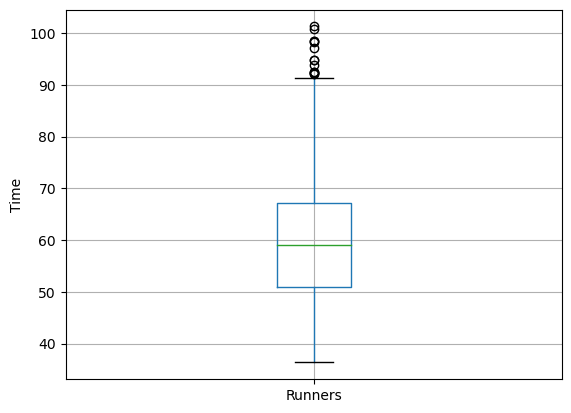

In [145]:
testo.boxplot(column='Time_mins')
plt.grid(True, axis='y')
plt.ylabel('Time')
plt.xticks([1], ['Runners'])


/var/folders/71/cw4619mx1cg51qdyd4685r3r0000gp/T/ipykernel_70691/3055042308.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})


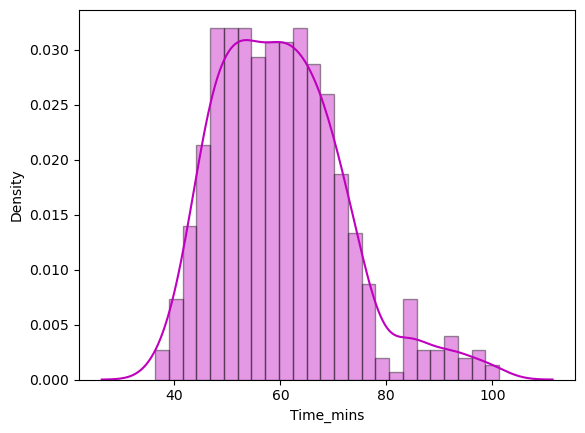

In [148]:
#### Question 2: Did the runners' finish times follow a normal distribution? #######

#Below is a distribution plot of runners' times plotted using the seaborn library. 
# The distribution looks almost normal.
x = testo['Time_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()


/var/folders/71/cw4619mx1cg51qdyd4685r3r0000gp/T/ipykernel_70691/2140208590.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
/var/folders/71/cw4619mx1cg51qdyd4685r3r0000gp/T/ipykernel_70691/2140208590.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/

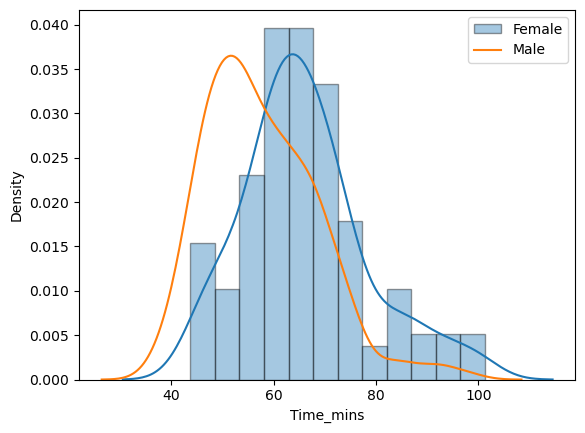

In [152]:
#### Question 3: Were there any performance differences between males and females of various age groups. #######

f_fuko = testo.loc[testo[' Gender']=='F']['Time_mins']
m_fuko = testo.loc[testo[' Gender']=='M']['Time_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

# The distribution indicates that females were slower than males on average. 


In [154]:
### compute summary statistics for males and females separately 

g_stats = testo.groupby(" Gender", as_index=True).describe()
display(g_stats)

#The average time for all females and males was ~66 mins and ~58 mins, respectively. 


Time_mins                                                         \
            count       mean        std        min        25%        50%   
 Gender                                                                    
F           163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
M           414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
F        72.058333  101.300000  
M        64.804167   98.516667

Text(0.5, 0.98, '')

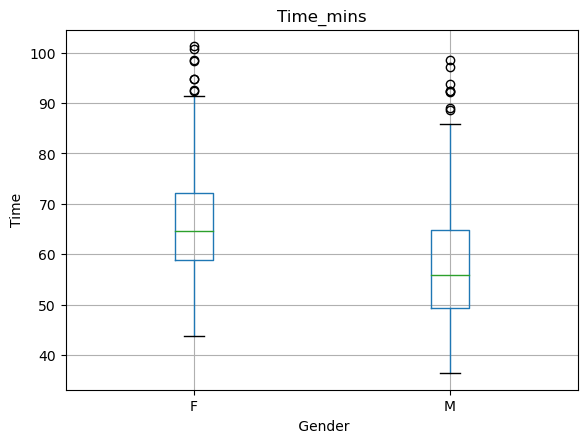

In [155]:
#Below is a side-by-side boxplot comparison of male and female finish times.
testo.boxplot(column='Time_mins', by=' Gender')
plt.ylabel('Time')
plt.suptitle("")


 CONCLUSION

We performed web scraping using Python. 
We used the Beautiful Soup library to parse html data 
and convert it into a form that can be used for analysis. 

We performed cleaning of the data in Python 
and created useful plots (box plots, bar plots, and distribution plots) 
to reveal interesting trends using Python's matplotlib and seaborn libraries. 

Now you can use Python to easily scrape data from the web, 
apply cleaning techniques 
and extract useful insights from the data.

